In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score
from sqlalchemy import create_engine
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [ ]:
#загружаем набор данных
dataset= pd.read_csv('dataset.csv')
#первые 5 строк
dataset.head(5)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [ ]:
engine = create_engine('sqlite:///database.db', echo = True)

dataset.to_sql('sport_df', con=engine, if_exists='replace')

2024-05-03 07:45:57,544 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2024-05-03 07:45:57,562 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("sport_df")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("sport_df")


2024-05-03 07:45:57,568 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-03 07:45:57,573 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("sport_df")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("sport_df")


2024-05-03 07:45:57,578 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-03 07:45:57,581 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


INFO:sqlalchemy.engine.Engine:SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


2024-05-03 07:45:57,583 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-03 07:45:57,586 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_temp_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


INFO:sqlalchemy.engine.Engine:SELECT name FROM sqlite_temp_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


2024-05-03 07:45:57,588 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-03 07:45:57,591 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("sport_df")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_xinfo("sport_df")


2024-05-03 07:45:57,594 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-03 07:45:57,598 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


2024-05-03 07:45:57,600 INFO sqlalchemy.engine.Engine [raw sql] ('sport_df',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('sport_df',)


2024-05-03 07:45:57,607 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("sport_df")


INFO:sqlalchemy.engine.Engine:PRAGMA main.foreign_key_list("sport_df")


2024-05-03 07:45:57,609 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-03 07:45:57,612 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("sport_df")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.foreign_key_list("sport_df")


2024-05-03 07:45:57,615 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-03 07:45:57,618 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


2024-05-03 07:45:57,620 INFO sqlalchemy.engine.Engine [raw sql] ('sport_df',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('sport_df',)


2024-05-03 07:45:57,623 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("sport_df")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_list("sport_df")


2024-05-03 07:45:57,625 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-03 07:45:57,628 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_sport_df_index")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_info("ix_sport_df_index")


2024-05-03 07:45:57,630 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-03 07:45:57,633 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("sport_df")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_list("sport_df")


2024-05-03 07:45:57,635 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-03 07:45:57,639 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_sport_df_index")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_info("ix_sport_df_index")


2024-05-03 07:45:57,642 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-03 07:45:57,645 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


2024-05-03 07:45:57,648 INFO sqlalchemy.engine.Engine [raw sql] ('sport_df',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('sport_df',)


2024-05-03 07:45:57,652 INFO sqlalchemy.engine.Engine 
DROP TABLE sport_df


INFO:sqlalchemy.engine.Engine:
DROP TABLE sport_df


2024-05-03 07:45:57,655 INFO sqlalchemy.engine.Engine [no key 0.00276s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00276s] ()


2024-05-03 07:45:57,670 INFO sqlalchemy.engine.Engine 
CREATE TABLE sport_df (
	"index" BIGINT, 
	"Unnamed: 0" BIGINT, 
	player_name TEXT, 
	team_abbreviation TEXT, 
	age FLOAT, 
	player_height FLOAT, 
	player_weight FLOAT, 
	college TEXT, 
	country TEXT, 
	draft_year TEXT, 
	draft_round TEXT, 
	draft_number TEXT, 
	gp BIGINT, 
	pts FLOAT, 
	reb FLOAT, 
	ast FLOAT, 
	net_rating FLOAT, 
	oreb_pct FLOAT, 
	dreb_pct FLOAT, 
	usg_pct FLOAT, 
	ts_pct FLOAT, 
	ast_pct FLOAT, 
	season TEXT
)




INFO:sqlalchemy.engine.Engine:
CREATE TABLE sport_df (
	"index" BIGINT, 
	"Unnamed: 0" BIGINT, 
	player_name TEXT, 
	team_abbreviation TEXT, 
	age FLOAT, 
	player_height FLOAT, 
	player_weight FLOAT, 
	college TEXT, 
	country TEXT, 
	draft_year TEXT, 
	draft_round TEXT, 
	draft_number TEXT, 
	gp BIGINT, 
	pts FLOAT, 
	reb FLOAT, 
	ast FLOAT, 
	net_rating FLOAT, 
	oreb_pct FLOAT, 
	dreb_pct FLOAT, 
	usg_pct FLOAT, 
	ts_pct FLOAT, 
	ast_pct FLOAT, 
	season TEXT
)




2024-05-03 07:45:57,673 INFO sqlalchemy.engine.Engine [no key 0.00251s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00251s] ()


2024-05-03 07:45:57,686 INFO sqlalchemy.engine.Engine CREATE INDEX ix_sport_df_index ON sport_df ("index")


INFO:sqlalchemy.engine.Engine:CREATE INDEX ix_sport_df_index ON sport_df ("index")


2024-05-03 07:45:57,688 INFO sqlalchemy.engine.Engine [no key 0.00253s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00253s] ()


2024-05-03 07:45:58,210 INFO sqlalchemy.engine.Engine INSERT INTO sport_df ("index", "Unnamed: 0", player_name, team_abbreviation, age, player_height, player_weight, college, country, draft_year, draft_round, draft_number, gp, pts, reb, ast, net_rating, oreb_pct, dreb_pct, usg_pct, ts_pct, ast_pct, season) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


INFO:sqlalchemy.engine.Engine:INSERT INTO sport_df ("index", "Unnamed: 0", player_name, team_abbreviation, age, player_height, player_weight, college, country, draft_year, draft_round, draft_number, gp, pts, reb, ast, net_rating, oreb_pct, dreb_pct, usg_pct, ts_pct, ast_pct, season) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


2024-05-03 07:45:58,215 INFO sqlalchemy.engine.Engine [generated in 0.35099s] [(0, 0, 'Dennis Rodman', 'CHI', 36.0, 198.12, 99.79024, 'Southeastern Oklahoma State', 'USA', '1986', '2', '27', 55, 5.7, 16.1, 3.1, 16.1, 0.186, 0.3229999999999999, 0.1, 0.479, 0.113, '1996-97'), (1, 1, 'Dwayne Schintzius', 'LAC', 28.0, 215.9, 117.93392, 'Florida', 'USA', '1990', '1', '24', 15, 2.3, 1.5, 0.3, 12.3, 0.078, 0.151, 0.175, 0.43, 0.048, '1996-97'), (2, 2, 'Earl Cureton', 'TOR', 39.0, 205.74, 95.25432, 'Detroit Mercy', 'USA', '1979', '3', '58', 9, 0.8, 1.0, 0.4, -2.1, 0.105, 0.102, 0.103, 0.376, 0.148, '1996-97'), (3, 3, "Ed O'Bannon", 'DAL', 24.0, 203.2, 100.697424, 'UCLA', 'USA', '1995', '1', '9', 64, 3.7, 2.3, 0.6, -8.7, 0.06, 0.149, 0.1669999999999999, 0.3989999999999999, 0.077, '1996-97'), (4, 4, 'Ed Pinckney', 'MIA', 34.0, 205.74, 108.86208, 'Villanova', 'USA', '1985', '1', '10', 27, 2.4, 2.4, 0.2, -11.2, 0.109, 0.179, 0.127, 0.611, 0.04, '1996-97'), (5, 5, 'Eddie Johnson', 'HOU', 38.0, 200.

INFO:sqlalchemy.engine.Engine:[generated in 0.35099s] [(0, 0, 'Dennis Rodman', 'CHI', 36.0, 198.12, 99.79024, 'Southeastern Oklahoma State', 'USA', '1986', '2', '27', 55, 5.7, 16.1, 3.1, 16.1, 0.186, 0.3229999999999999, 0.1, 0.479, 0.113, '1996-97'), (1, 1, 'Dwayne Schintzius', 'LAC', 28.0, 215.9, 117.93392, 'Florida', 'USA', '1990', '1', '24', 15, 2.3, 1.5, 0.3, 12.3, 0.078, 0.151, 0.175, 0.43, 0.048, '1996-97'), (2, 2, 'Earl Cureton', 'TOR', 39.0, 205.74, 95.25432, 'Detroit Mercy', 'USA', '1979', '3', '58', 9, 0.8, 1.0, 0.4, -2.1, 0.105, 0.102, 0.103, 0.376, 0.148, '1996-97'), (3, 3, "Ed O'Bannon", 'DAL', 24.0, 203.2, 100.697424, 'UCLA', 'USA', '1995', '1', '9', 64, 3.7, 2.3, 0.6, -8.7, 0.06, 0.149, 0.1669999999999999, 0.3989999999999999, 0.077, '1996-97'), (4, 4, 'Ed Pinckney', 'MIA', 34.0, 205.74, 108.86208, 'Villanova', 'USA', '1985', '1', '10', 27, 2.4, 2.4, 0.2, -11.2, 0.109, 0.179, 0.127, 0.611, 0.04, '1996-97'), (5, 5, 'Eddie Johnson', 'HOU', 38.0, 200.66, 97.52228, 'Illinois'

2024-05-03 07:45:58,315 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


12305

In [ ]:
#дескриптивная статистика
dataset.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000
mean,6152.000000,27.084518,200.611602,100.369926,51.290532,8.172775,3.559155,1.813986,-2.255733,0.054473,0.141014,0.184891,0.511060,0.131358
std,3552.291866,4.335868,9.146321,12.477150,25.095909,5.974957,2.483550,1.794155,12.673254,0.043599,0.062704,0.053390,0.101163,0.094483
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3076.000000,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.480000,0.066000
50%,6152.000000,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.041000,0.131000,0.181000,0.524000,0.103000
75%,9228.000000,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.217000,0.561000,0.178000
max,12304.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [ ]:
print('Размер датасета',dataset.shape)

Размер датасета (12305, 22)


In [ ]:
# проверяем все ли данные на месте / сумма пустот по столбцам
dataset.isna().sum()

Unnamed: 0              0
player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college              1789
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64

В столбце college 1789 строк без значения

In [ ]:
# выводим информацию по модели данных (типы столбцов)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12305 non-null  int64  
 1   player_name        12305 non-null  object 
 2   team_abbreviation  12305 non-null  object 
 3   age                12305 non-null  float64
 4   player_height      12305 non-null  float64
 5   player_weight      12305 non-null  float64
 6   college            10516 non-null  object 
 7   country            12305 non-null  object 
 8   draft_year         12305 non-null  object 
 9   draft_round        12305 non-null  object 
 10  draft_number       12305 non-null  object 
 11  gp                 12305 non-null  int64  
 12  pts                12305 non-null  float64
 13  reb                12305 non-null  float64
 14  ast                12305 non-null  float64
 15  net_rating         12305 non-null  float64
 16  oreb_pct           123


#Используя линейную регрессию, логистическую регрессию и SVM, была оценена зависимость роста игроков (player_height) от их веса (player_weight) для уникальных игроков всех команд за все сезоны. После каждого метода была выведена оценка score модели, а также построена визуализация с использованием библиотек Matplotlib и Seaborn.

#Зависимость роста от веса:

Усредним значения по каждому игроку:

In [ ]:
data = dataset[['player_name', 'player_height', 'player_weight']].groupby(['player_name'], as_index=False).mean(numeric_only=True)
data.head(5)

,player_name,player_height,player_weight
0,A.C. Green,205.74,102.058200
1,A.J. Bramlett,208.28,102.965384
2,A.J. Guyton,185.42,81.646560
3,AJ Hammons,213.36,117.933920
4,AJ Price,187.96,84.821704


Размер датасета после обработки:

In [ ]:
print('Размер датасета', data.shape)

Размер датасета (2463, 3)


#Линейная регрессия

In [ ]:
# Выбираем необходимые столбцы
X = data[['player_weight']]
y = data[['player_height']]

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Инициализация
linear_reg = LinearRegression()

# Обучение
linear_reg.fit(X_train, y_train)

# Предсказание роста по весу на тестовых данных
y_pred = linear_reg.predict(X_test)

# Оценка качества модели
print("Score тестовой выборки:", linear_reg.score(X_train, y_train))

Score тестовой выборки: 0.6775233099677989


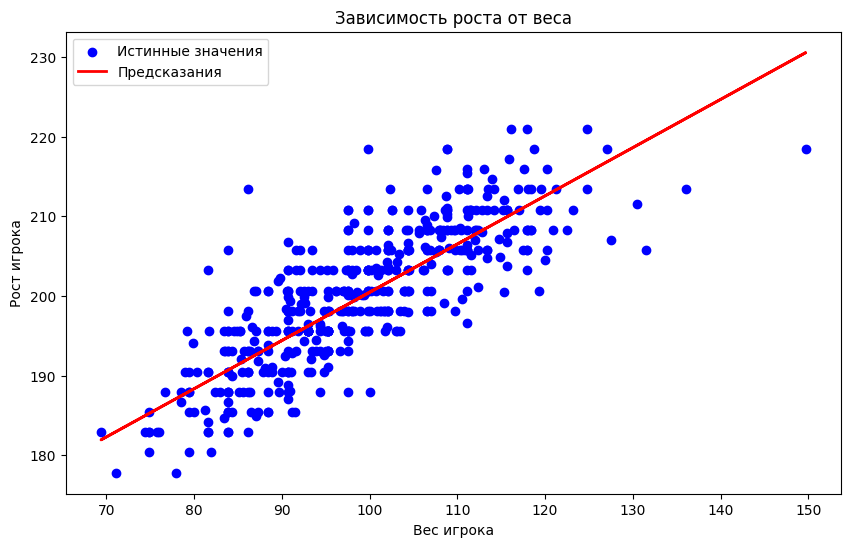

In [ ]:
# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Истинные значения')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Предсказания')
plt.title('Зависимость роста от веса')
plt.xlabel('Вес игрока')
plt.ylabel('Рост игрока')
plt.legend()
plt.show()

#Разделение на классы:


Установим порогоничное значение.
Для этого найдем среднее значение роста

In [ ]:
mean_height = data['player_height'].mean()

print("Среднее значение роста:", mean_height)

Среднее значение роста: 200.1634903225319


Разделим игроков на низких и высоких

In [ ]:
def assign_class(height):
    if height > mean_height:
        return 1
    else:
        return 0
data['height_class'] = data['player_height'].apply(assign_class)
print(data.head(5))

     player_name  player_height  player_weight  height_class
0     A.C. Green         205.74     102.058200             1
1  A.J. Bramlett         208.28     102.965384             1
2    A.J. Guyton         185.42      81.646560             0
3     AJ Hammons         213.36     117.933920             1
4       AJ Price         187.96      84.821704             0


#Логистическая регрессия

In [ ]:
X = data[['player_weight']]
y = data['height_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 28)

In [ ]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)
print("Scoreтренировочной выборки:", logistic_reg.score(X_train, y_train))
print("Score тестовой выборки:", logistic_reg.score(X_test, y_test))

Scoreтренировочной выборки: 0.8355329949238579
Score тестовой выборки: 0.8498985801217038


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


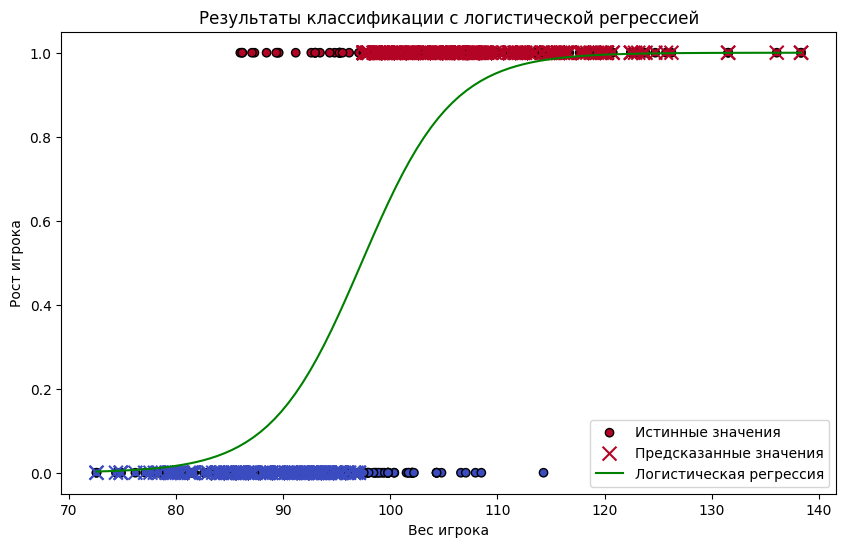

In [ ]:
x_values = np.linspace(X_test.min(), X_test.max(), 100)
y_values = logistic_reg.predict_proba(x_values.reshape(-1, 1))[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, c=y_test, cmap='coolwarm', edgecolors='k', label='Истинные значения')
plt.scatter(X_test, y_pred, c=y_pred, cmap='coolwarm', marker='x', s=100, label='Предсказанные значения')
plt.plot(x_values, y_values, color='green', label='Логистическая регрессия')
plt.xlabel('Вес игрока')
plt.ylabel('Рост игрока')
plt.title('Результаты классификации с логистической регрессией')
plt.legend()
plt.show()

#SVM

In [ ]:
X = data[['player_weight']]
y = data['height_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [ ]:
svm = svm.SVC(kernel='rbf')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("Scoreтренировочной выборки:", svm.score(X_train, y_train))
print("Score тестовой выборки:", svm.score(X_test, y_test))

Scoreтренировочной выборки: 0.8375634517766497
Score тестовой выборки: 0.847870182555781


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


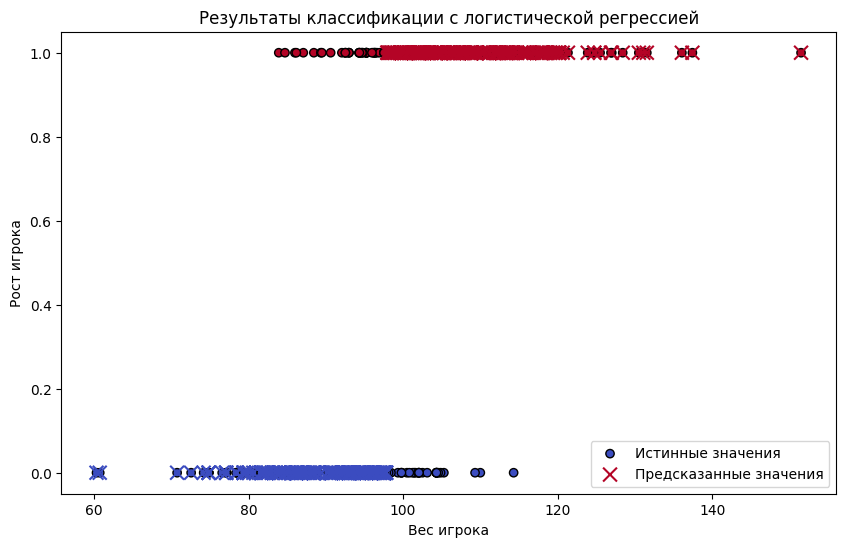

In [ ]:
x_values = np.linspace(X_test.min(), X_test.max(), 100)
y_values = logistic_reg.predict_proba(x_values.reshape(-1, 1))[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, c=y_test, cmap='coolwarm', edgecolors='k', label='Истинные значения')
plt.scatter(X_test, y_pred, c=y_pred, cmap='coolwarm', marker='x', s=100, label='Предсказанные значения')
plt.xlabel('Вес игрока')
plt.ylabel('Рост игрока')
plt.title('Результаты классификации с логистической регрессией')
plt.legend()
plt.show()

#Далее был использован алгоритм Дерева Принятия Решений для определения названия команды (team_abbreviation) как целевой переменной Y за сезон 2010-11. В качестве атрибутов (Xi) использовались среднее количество очков (pts), подборов (reb), голевых передач (ast), а также средний рост (player_height) и вес (player_width) всех игроков команды за сезон.








#Дерево решений:


Подготовим необходимые данные:

In [ ]:
#загружаем набор данных
dataset= pd.read_csv('dataset.csv')

data = dataset[dataset.season == '2010-11']
data = data[['team_abbreviation', 'pts', 'reb', 'ast', 'player_height', 'player_weight']].groupby(['team_abbreviation'], as_index = False).mean(numeric_only = True)
data.head(5)


,team_abbreviation,pts,reb,ast,player_height,player_weight
0,ATL,7.892857,3.435714,1.828571,203.2000,105.298143
1,BOS,8.437500,3.525000,2.000000,200.9775,103.674121
2,CHA,6.668750,3.175000,1.512500,201.6125,102.001501
3,CHI,8.300000,3.928571,1.828571,200.6600,99.207050
4,CLE,8.506250,3.875000,1.787500,200.9775,102.426744


Обучение

In [ ]:
X = data.drop('team_abbreviation', axis=1)
Y = data['team_abbreviation']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Создание и обучение модели Дерева Принятия Решений
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе и оценка точности
y_pred = model.predict(X_test)

print("Score тестовой выборки:", model.score(X_test, y_test))
print("Score тренировочной выборки:", model.score(X_train, y_train))

Score тестовой выборки: 0.0
Score тренировочной выборки: 1.0


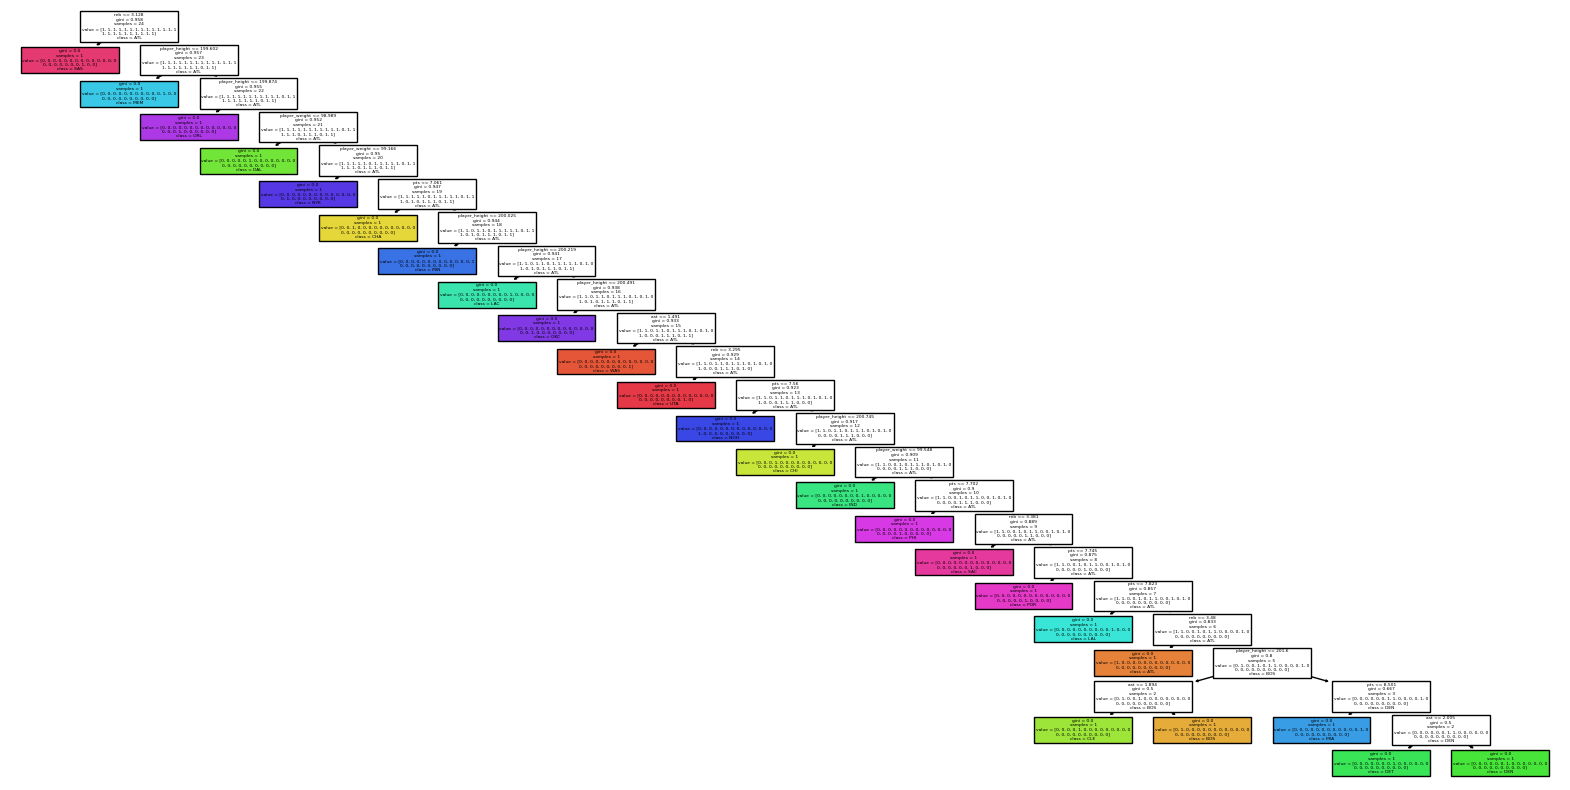

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=model.classes_)
plt.show()


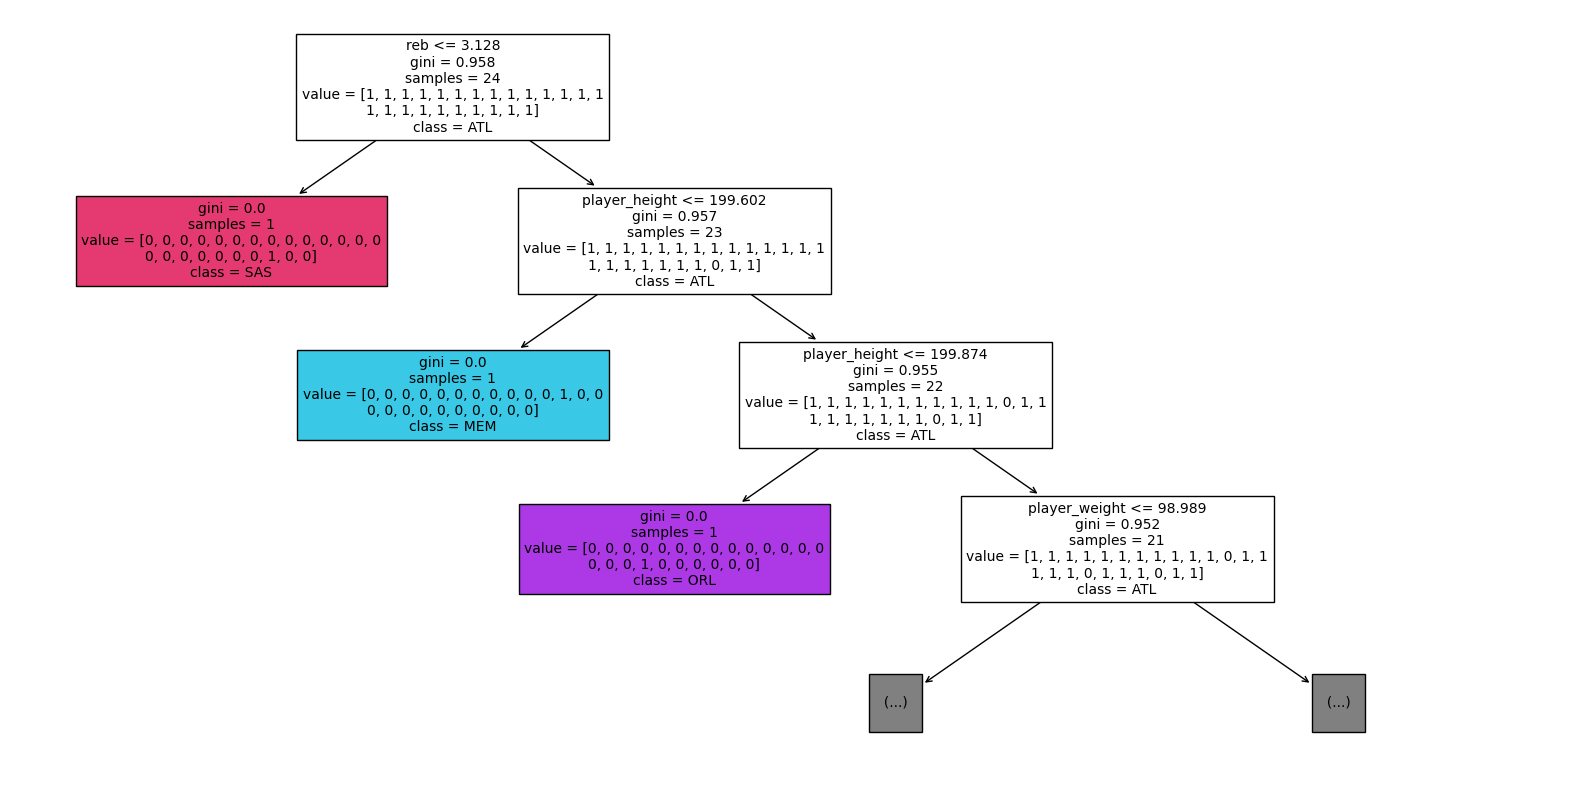

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(model,
          filled=True,
          feature_names=X.columns,
          class_names=model.classes_,
          fontsize=10,
          max_depth=3)               # Максимальная глубина дерева
plt.show()


#Используя выбранные атрибуты из предложенного датасета, была построена классификация данных с использованием произвольных атрибутов-признаков, включая возможность создания новых вычисляемых атрибутов-признаков.


# Классификация по числу подборов

Матрица корреляции

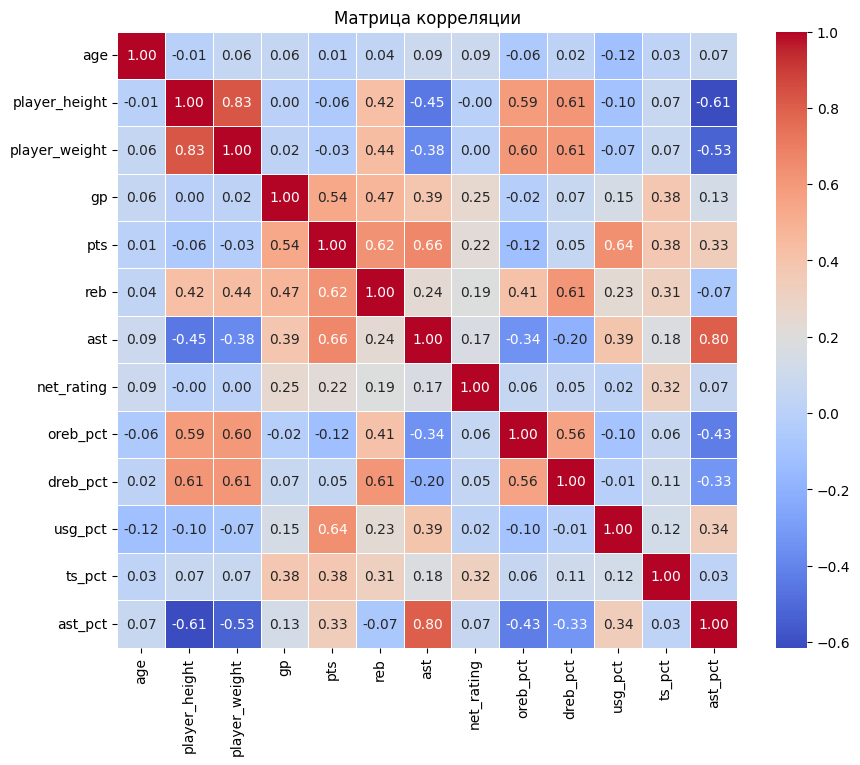

In [ ]:
data = pd.read_csv('dataset.csv')

columns_to_drop = ['player_name', 'team_abbreviation', 'college', 'country', 'draft_year', 'draft_round', 'draft_number', 'draft_year', 'season', 'Unnamed: 0']
data = data.drop(columns=columns_to_drop, axis=1)

correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Матрица корреляции')
plt.show()

Выбор значимых параметров

In [ ]:
corr_with_reb = correlation_matrix['reb'].abs()
top_corr_with_reb = corr_with_reb.sort_values(ascending=False).head(10)
print("Параметры с наибольшей корреляцией с 'reb':")
print(top_corr_with_reb)

Параметры с наибольшей корреляцией с 'reb':
reb              1.000000
pts              0.624889
dreb_pct         0.612226
gp               0.470948
player_weight    0.437930
player_height    0.423275
oreb_pct         0.407976
ts_pct           0.314569
ast              0.241018
usg_pct          0.230552
Name: reb, dtype: float64


Группируем средние значения параметров по игрокам

In [ ]:
data = dataset[['player_name', 'reb', 'pts', 'player_weight', 'gp', 'player_height', 'oreb_pct', 'dreb_pct']].groupby(['player_name'], as_index=False).mean(numeric_only=True)
data.head(5)

,player_name,reb,pts,player_weight,gp,player_height,oreb_pct,dreb_pct
0,A.C. Green,6.060000,5.78,102.058200,75.800000,205.74,0.093000,0.186400
1,A.J. Bramlett,2.800000,1.00,102.965384,8.000000,208.28,0.158000,0.208000
2,A.J. Guyton,0.700000,3.80,81.646560,26.666667,185.42,0.013333,0.040000
3,AJ Hammons,1.600000,2.20,117.933920,22.000000,213.36,0.049000,0.199000
4,AJ Price,1.333333,5.35,84.821704,43.500000,187.96,0.017667,0.090833


In [ ]:
print('Размер датасета',data.shape)

Размер датасета (2463, 8)


классификаци по подборам

In [ ]:
# Задаем минимальное и максимальное значения подборов
min_value = data['reb'].min()
max_value = data['reb'].max()

# Разделение диапазона на четыре равные части
parts = 4
boundaries = np.linspace(min_value, max_value, parts + 1)

# Вывод границ каждого класса
print("Границы 0 класса:", boundaries[0], ' - ', boundaries[1])
print("Границы 1 класса:", boundaries[1], ' - ', boundaries[2])
print("Границы 2 класса:", boundaries[2], ' - ', boundaries[3])
print("Границы 2 класса:", boundaries[3], ' - ', boundaries[4])

# Добавление новой колонки с классами в датасет
data['reb_class'] = np.digitize(data['reb'], boundaries) - 1
data.head(5)

Границы 0 класса: 0.0  -  3.5375
Границы 1 класса: 3.5375  -  7.075
Границы 2 класса: 7.075  -  10.6125
Границы 2 класса: 10.6125  -  14.15


,player_name,reb,pts,player_weight,gp,player_height,oreb_pct,dreb_pct,reb_class
0,A.C. Green,6.060000,5.78,102.058200,75.800000,205.74,0.093000,0.186400,1
1,A.J. Bramlett,2.800000,1.00,102.965384,8.000000,208.28,0.158000,0.208000,0
2,A.J. Guyton,0.700000,3.80,81.646560,26.666667,185.42,0.013333,0.040000,0
3,AJ Hammons,1.600000,2.20,117.933920,22.000000,213.36,0.049000,0.199000,0
4,AJ Price,1.333333,5.35,84.821704,43.500000,187.96,0.017667,0.090833,0


Разделение данных

In [ ]:
data = pd.get_dummies(data)
X = data.drop(['reb_class','reb'], axis=1)
Y = data['reb_class']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=76)

Классификация методом SVM

Score тренировочной выборки: 0.9908629441624366
Score тестовой выборки: 0.8803245436105477
Precision: 0.8781970763595868
Recall: 0.8803245436105477


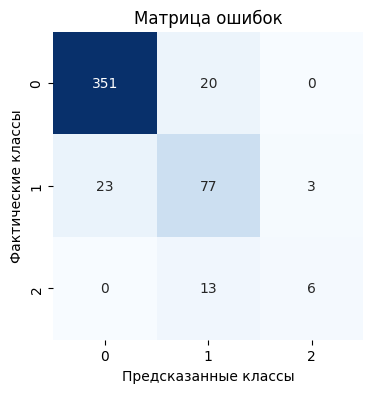

In [ ]:
svm_model = SVC(kernel='linear', random_state=1)
svm_model.fit(X_train, y_train)
y_pred_svm_model = svm_model.predict(X_test)

print("Score тренировочной выборки:",  svm_model.score(X_train, y_train))
print("Score тестовой выборки:", svm_model.score(X_test, y_test))

precision = precision_score(y_test, y_pred_svm_model, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test, y_pred_svm_model, average='weighted')
print("Recall:", recall)

# Вычисление матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred_svm_model)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

plt.title("Матрица ошибок")
plt.xlabel("Предсказанные классы")
plt.ylabel("Фактические классы")
plt.show()


Классификация методом градиентного бустинга

Score тренировочной выборки: 1.0
Score тестовой выборки: 0.9148073022312373
Precision: 0.9159333550665134
Recall: 0.9148073022312373


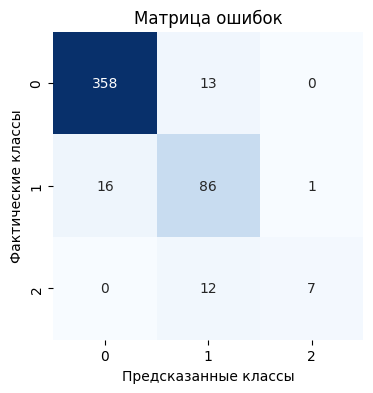

In [ ]:
gb_model = GradientBoostingClassifier(random_state=39)
gb_model.fit(X_train, y_train)
y_pred_gb_model = gb_model.predict(X_test)

print("Score тренировочной выборки:",  gb_model.score(X_train, y_train))
print("Score тестовой выборки:", gb_model.score(X_test, y_test))

precision = precision_score(y_test, y_pred_gb_model, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test, y_pred_gb_model, average='weighted')
print("Recall:", recall)

# Вычисление матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred_gb_model)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

plt.title("Матрица ошибок")
plt.xlabel("Предсказанные классы")
plt.ylabel("Фактические классы")
plt.show()

Классификация методом случайного леса

Score тренировочной выборки: 1.0
Score тестовой выборки: 0.9107505070993914
Precision: 0.9142555753363948
Recall: 0.9107505070993914


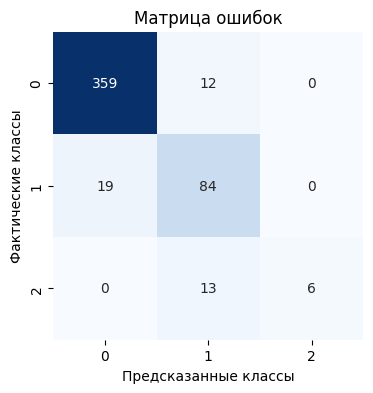

In [ ]:
rf_model = RandomForestClassifier(random_state=39)
rf_model.fit(X_train, y_train)
y_pred_rf_model = rf_model.predict(X_test)

print("Score тренировочной выборки:",  rf_model.score(X_train, y_train))
print("Score тестовой выборки:", rf_model.score(X_test, y_test))

precision = precision_score(y_test, y_pred_rf_model, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test, y_pred_rf_model, average='weighted')
print("Recall:", recall)

# Вычисление матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred_rf_model)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

plt.title("Матрица ошибок")
plt.xlabel("Предсказанные классы")
plt.ylabel("Фактические классы")
plt.show()

Классификация методом логистической регрессии

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score тренировочной выборки: 0.8137055837563452
Score тестовой выборки: 0.8012170385395537
Precision: 0.7911469269677737
Recall: 0.8012170385395537


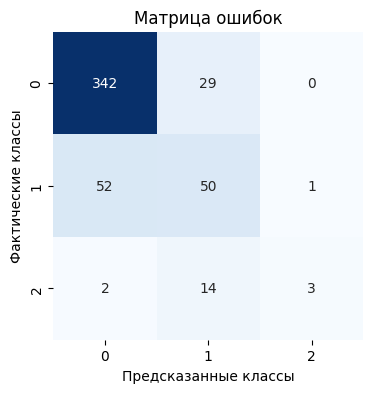

In [ ]:
lr_model = LogisticRegression(random_state=39)
lr_model.fit(X_train, y_train)

y_pred_lr_model = lr_model.predict(X_test)

print("Score тренировочной выборки:",  lr_model.score(X_train, y_train))
print("Score тестовой выборки:", lr_model.score(X_test, y_test))

precision = precision_score(y_test,
y_pred_lr_model, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test,
y_pred_lr_model, average='weighted')
print("Recall:", recall)

# Вычисление матрицы ошибок
conf_matrix = confusion_matrix(y_test,
y_pred_lr_model)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

plt.title("Матрица ошибок")
plt.xlabel("Предсказанные классы")
plt.ylabel("Фактические классы")
plt.show()

In [ ]:
# Метрики
metrics = {
    'Score': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score
}

models = [svm_model, rf_model, gb_model, lr_model]
y_preds = [y_pred_svm_model, y_pred_rf_model, y_pred_gb_model, y_pred_lr_model]
model_names = ['SVM', 'Random Forest', 'Gradient Boosting', 'Logistic Regression']

results = {}
for name, y_pred in zip(model_names, y_preds):
    results[name] = {}
    for metric_name, metric_func in metrics.items():
        if metric_name in ['Score']:
            results[name][metric_name] = metric_func(y_test, y_pred)
        else:
            results[name][metric_name] = metric_func(y_test, y_pred, average='weighted')

# Вывод результатов
for metric_name in metrics.keys():
    print(metric_name)
    for model_name, metrics_dict in results.items():
        print(f"{model_name}: {metrics_dict[metric_name]}")
    print()


Score
SVM: 0.8803245436105477
Random Forest: 0.9107505070993914
Gradient Boosting: 0.9148073022312373
Logistic Regression: 0.8012170385395537

Precision
SVM: 0.8781970763595868
Random Forest: 0.9142555753363948
Gradient Boosting: 0.9159333550665134
Logistic Regression: 0.7911469269677737

Recall
SVM: 0.8803245436105477
Random Forest: 0.9107505070993914
Gradient Boosting: 0.9148073022312373
Logistic Regression: 0.8012170385395537



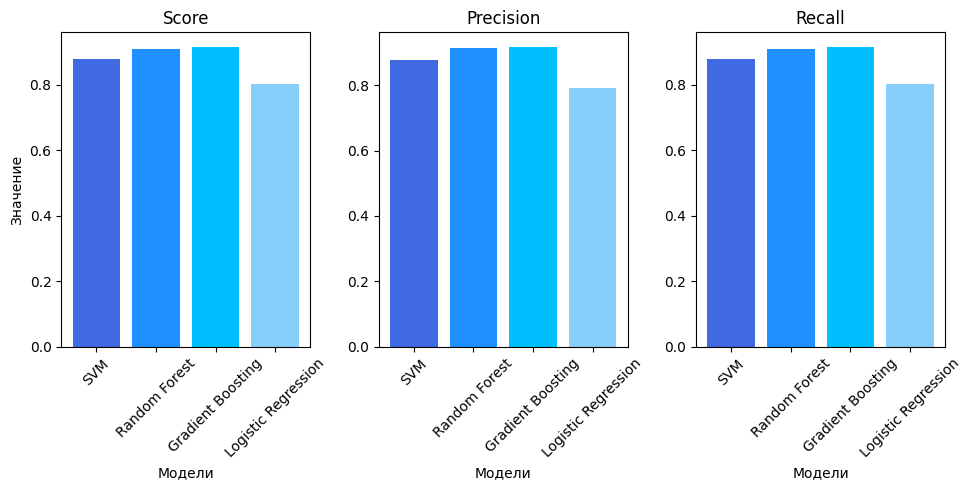

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Создание словаря с цветами для каждой модели (синяя цветовая гамма)
colors = {
    'SVM': 'royalblue',
    'Random Forest': 'dodgerblue',
    'Gradient Boosting': 'deepskyblue',
    'Logistic Regression': 'lightskyblue'
}

# Создание массивов для хранения значений метрик для каждой модели
score_values = []
precision_values = []
recall_values = []
mse_values = []
mae_values = []

# Заполнение массивов значениями метрик для каждой модели
for model_name, metrics_dict in results.items():
    score_values.append(metrics_dict['Score'])
    precision_values.append(metrics_dict['Precision'])
    recall_values.append(metrics_dict['Recall'])

# Создание гистограмм для каждой метрики
plt.figure(figsize=(16, 5))

# Score
plt.subplot(1, 5, 1)
for model_name, score_value in zip(model_names, score_values):
    plt.bar(model_name, score_value, color=colors[model_name])
plt.title('Score')
plt.xlabel('Модели')
plt.xticks(rotation=45)
plt.ylabel('Значение')

# Precision
plt.subplot(1, 5, 2)
for model_name, precision_value in zip(model_names, precision_values):
    plt.bar(model_name, precision_value, color=colors[model_name])
plt.title('Precision')
plt.xlabel('Модели')
plt.xticks(rotation=45)

# Recall
plt.subplot(1, 5, 3)
for model_name, recall_value in zip(model_names, recall_values):
    plt.bar(model_name, recall_value, color=colors[model_name])
plt.title('Recall')
plt.xlabel('Модели')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
